# **TUGAS MINGGU 1**

NAMA  : REYHAN VITO IDHAM PRATAMA

NIM   : A11.2020.12981

Tugas Minggu 1 berupa link GitHub yang berisi repository codingan dari dataset
hungarian.data Tugas Minggu 1 yang akan di-submit oleh mahasiswa Bimbingan Karir -
Data Science diharapkan sesuai dengan ketentuan berikut:
1. Tugas Minggu 1 wajib sampai ke tahap cleaning data (jika lebih dari tahap tersebut
lebih baik)
2. Ketentuan dalam source code Tugas Minggu 1 harus ada beberapa point berikut :
  
  1) Pengumpulan data

  2) Menelaah data

  3) Memvalidasi data

  4) Menentukan objek data

  5) Membersihkan data
3. Berikan keterangan atau penjelasan dengan bahasa masing-masing di setiap point /
step dalam source codenya.


## **1. PENGUMPULAN DATA**

Dataset diperoleh dari UC Irvine Machine Learning Repository dengan fokus pada diagnosis penyakit jantung. (https://archive.ics.uci.edu/dataset/45/heart+disease)

Direktori ini berisi empat basis data yang berkaitan dengan diagnosis penyakit jantung. Semua atribut bersifat numerik. Data ini dikumpulkan dari empat lokasi berikut:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Setiap basis data memiliki format instan yang sama. Meskipun basis data memiliki 76 atribut raw, hanya 14 di antaranya yang benar-benar digunakan. Oleh karena itu, telah dibuat 2 salinan dari setiap basis data: satu dengan semua atribut dan satu dengan 14 atribut yang sebenarnya digunakan dalam eksperimen sebelumnya.

Para penulis basis data ini meminta:

"...bahwa setiap publikasi yang muncul dari penggunaan data ini mencantumkan nama peneliti utama yang bertanggung jawab atas pengumpulan data di setiap lembaga. Mereka adalah:

       1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
       2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
       3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
       4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:
	  Robert Detrano, M.D., Ph.D.

Penting untuk dicatat bahwa dataset yang digunakan dalam tugas ini berasal dari Hungarian Institute of Cardiology dan secara khusus disebut sebagai **"hungarian.data".**

## **2. MENELAAH DATA**


### *IMPORT LIBRARY*

In [ ]:
# Import library pandas dengan alias 'pd' untuk memudahkan penggunaan
import pandas as pd

# Import modul re (regular expression) untuk bekerja dengan ekspresi reguler
import re

# Import library numpy dengan alias 'np' untuk operasi numerik efisien
import numpy as np

# Import modul itertools untuk membuat dan mengelola iterator
import itertools


### *LOAD DATA MOUNTING DRIVE*

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Menetapkan string path file ke variabel 'directory'
directory = '/content/gdrive/MyDrive/Heart_BK/hungarian.data'

# Menampilkan isi dari variabel 'directory' (dalam konteks ini, path file)
directory

'/content/gdrive/MyDrive/Heart_BK/hungarian.data'

In [ ]:
# Membuka file dengan path yang telah ditetapkan ke variabel 'directory'
with open(directory, encoding='Latin1') as file:
    # Membaca setiap baris dari file, membersihkan trailing whitespaces, dan menyimpannya dalam list 'lines'
    lines = [line.strip() for line in file]

# Menampilkan 10 baris pertama dari list 'lines'
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

***Trailing whitespaces*** merujuk pada spasi atau karakter kosong yang mungkin ada di ujung akhir **(akhir baris)** dari sebuah string. Mereka mungkin muncul secara tidak sengaja saat membuat atau menyimpan file teks. Meskipun seringkali tidak terlihat saat membaca teks, tetapi bisa menjadi masalah terutama saat memproses data, karena mereka dapat mempengaruhi kesesuaian atau perbandingan string.

***line.strip()*** digunakan untuk membersihkan setiap baris dari trailing whitespaces. ***Fungsi strip()*** menghapus spasi ekstra di awal dan akhir setiap baris. Ini membantu dalam membersihkan data sehingga tidak ada karakter tambahan yang tidak diinginkan yang dapat memengaruhi analisis atau pemrosesan selanjutnya.

### *MEMBUAT DATAFRAME PANDAS*



---


itertools.takewhile adalah fungsi yang mengambil elemen dari iterable selama kondisi tertentu terpenuhi.

Pada kasus ini, `***lambda x: len(x) == 76***` adalah kondisi yang menyatakan bahwa kita akan terus mengambil elemen selama panjang elemen (jumlah kolom) adalah 76.

*`' '.join(lines[i:(i+10)]).split()`* menggabungkan sepuluh baris menjadi satu string, lalu membaginya berdasarkan spasi. Ini dilakukan untuk menggabungkan setiap sepuluh baris menjadi satu string agar dapat diolah lebih lanjut.


`for i in range(0, len(lines), 10)` digunakan untuk mengambil setiap sepuluh baris dari lines.

In [ ]:
# Menggunakan itertools.takewhile untuk mengambil data dari lines
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

# Membuat DataFrame pandas dari hasil data
df = pd.DataFrame.from_records(data)

# Menampilkan 5 baris pertama dari DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,0,289,-9,-9,-9,0,-9,-9,0,12,16,84,0,0,0,0,0,150,18,-9,7,172,86,200,110,140,86,0,0,0,-9,26,20,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,12,20,84,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,1,180,-9,-9,-9,0,-9,-9,0,11,16,84,0,0,0,0,0,-9,10,9,7,156,100,220,106,160,90,0,0,1,2,14,13,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,11,20,84,1,-9,-9,2,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,0,283,-9,-9,-9,0,-9,-9,1,11,21,84,0,0,0,0,0,100,10,-9,5,98,58,180,100,130,80,0,0,0,-9,17,14,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,11,26,84,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,0,214,-9,-9,-9,0,-9,-9,0,9,21,84,0,0,0,0,0,50,5,4,4,108,54,210,106,138,86,1,0,1.5,2,19,22,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,9,30,84,3,-9,2,-9,-9,2,-9,-9,-9,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,0,-9,-9,-9,-9,0,-9,-9,0,7,25,84,0,0,1,1,0,25,2,-9,3,122,74,130,100,150,90,0,1,0,-9,13,9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,7,30,84,0,-9,-9,-9,-9,1,-9,-9,-9,1,-9,1,1,1,1,1,-9.,-9.,name


### *MENGHAPUS KOLOM PERTAMA*

In [ ]:
# Menghapus kolom terakhir dari DataFrame df
df = df.iloc[:, :-1]


### *MENGHAPUS KOLOM TERAKHIR*

In [ ]:
# Menghapus kolom pertama dari DataFrame df menggunakan drop
df = df.drop(df.columns[0], axis=1)

# Menampilkan beberapa baris pertama DataFrame setelah penghapusan
print(df.head())

  1   2  3  4  5  6   7  8    9  10   11  12  13  14 15  16  17 18  19  20  \
0  0  40  1  1  0  0  -9  2  140  0  289  -9  -9  -9  0  -9  -9  0  12  16   
1  0  49  0  1  0  0  -9  3  160  1  180  -9  -9  -9  0  -9  -9  0  11  16   
2  0  37  1  1  0  0  -9  2  130  0  283  -9  -9  -9  0  -9  -9  1  11  21   
3  0  48  0  1  1  1  -9  4  138  0  214  -9  -9  -9  0  -9  -9  0   9  21   
4  0  54  1  1  0  1  -9  3  150  0   -9  -9  -9  -9  0  -9  -9  0   7  25   

   21 22 23 24 25 26   27  28  29 30   31   32   33   34   35  36 37 38   39  \
0  84  0  0  0  0  0  150  18  -9  7  172   86  200  110  140  86  0  0    0   
1  84  0  0  0  0  0   -9  10   9  7  156  100  220  106  160  90  0  0    1   
2  84  0  0  0  0  0  100  10  -9  5   98   58  180  100  130  80  0  0    0   
3  84  0  0  0  0  0   50   5   4  4  108   54  210  106  138  86  1  0  1.5   
4  84  0  0  1  1  0   25   2  -9  3  122   74  130  100  150  90  0  1    0   

   40  41  42  43  44  45  46  47  48  49  50  51 

## **3. VALIDASI DATA**

Validasi data adalah tahap penting dalam pembersihan dan persiapan data. Tujuannya adalah untuk memastikan bahwa data yang digunakan dalam analisis berkualitas tinggi dan dapat diandalkan.




---

**Pentingnya Pengelolaan Nilai Null pada Dataset:**

Dalam dataset ini, nilai yang hilang diidentifikasi dengan angka -9.0. Penggunaan nilai ini sebagai penanda kekosongan menunjukkan bahwa dalam data, angka tersebut digunakan untuk menandakan ketidaktersediaan informasi atau nilai yang hilang.

Dalam persiapan data, perlu dilakukan tindakan penghapusan fitur tertentu yang memiliki nilai -9.0. Langkah ini diperlukan untuk memastikan kebersihan dan konsistensi data sebelum melanjutkan ke tahap analisis. Oleh karena itu, fitur-fitur dengan nilai -9.0 perlu diperhatikan secara khusus, dan dalam beberapa kasus, tindakan penghapusan fitur ini dapat diterapkan. Hal ini bertujuan untuk memastikan integritas data sebelum melakukan analisis lebih lanjut pada dataset tersebut.

In [ ]:
# Mengonversi seluruh nilai dalam DataFrame df menjadi tipe data float
df = df.astype(float)

# Menampilkan beberapa baris pertama DataFrame setelah mengubah menjadi float
print(df.head())

    1     2    3    4    5    6    7    8      9    10     11   12   13   14  \
0  0.0  40.0  1.0  1.0  0.0  0.0 -9.0  2.0  140.0  0.0  289.0 -9.0 -9.0 -9.0   
1  0.0  49.0  0.0  1.0  0.0  0.0 -9.0  3.0  160.0  1.0  180.0 -9.0 -9.0 -9.0   
2  0.0  37.0  1.0  1.0  0.0  0.0 -9.0  2.0  130.0  0.0  283.0 -9.0 -9.0 -9.0   
3  0.0  48.0  0.0  1.0  1.0  1.0 -9.0  4.0  138.0  0.0  214.0 -9.0 -9.0 -9.0   
4  0.0  54.0  1.0  1.0  0.0  1.0 -9.0  3.0  150.0  0.0   -9.0 -9.0 -9.0 -9.0   

    15   16   17   18    19    20    21   22   23   24   25   26     27    28  \
0  0.0 -9.0 -9.0  0.0  12.0  16.0  84.0  0.0  0.0  0.0  0.0  0.0  150.0  18.0   
1  0.0 -9.0 -9.0  0.0  11.0  16.0  84.0  0.0  0.0  0.0  0.0  0.0   -9.0  10.0   
2  0.0 -9.0 -9.0  1.0  11.0  21.0  84.0  0.0  0.0  0.0  0.0  0.0  100.0  10.0   
3  0.0 -9.0 -9.0  0.0   9.0  21.0  84.0  0.0  0.0  0.0  0.0  0.0   50.0   5.0   
4  0.0 -9.0 -9.0  0.0   7.0  25.0  84.0  0.0  0.0  1.0  1.0  0.0   25.0   2.0   

    29   30     31     32     33



---


Dalam dataset ini, nilai yang tidak tersedia direpresentasikan oleh -9.0. Oleh karena itu, dilakukan konversi ke tipe data float. Alasan di balik konversi ini terletak pada fakta bahwa -9.0 bukanlah nilai yang valid untuk tipe data bilangan bulat. Penggunaan tipe data float memberikan keleluasaan untuk melakukan operasi kalkulasi numerik tanpa hambatan, memfasilitasi penyimpanan nilai desimal, dan menjaga konsistensi tipe data di seluruh DataFrame. Hal ini bertujuan untuk meningkatkan kejelasan dan keandalan analisis data secara keseluruhan.

### *MENGUBAH NILAI NULL VALUE*

In [ ]:
# Menggantikan nilai -9.0 dengan nilai NaN dalam DataFrame df
df.replace(-9.0, np.nan, inplace=True)

# Menampilkan beberapa baris pertama DataFrame setelah enggantikan nilai -9.0 dengan nilai NaN
print(df.head())

    1     2    3    4    5    6   7    8      9    10     11  12  13  14   15  \
0  0.0  40.0  1.0  1.0  0.0  0.0 NaN  2.0  140.0  0.0  289.0 NaN NaN NaN  0.0   
1  0.0  49.0  0.0  1.0  0.0  0.0 NaN  3.0  160.0  1.0  180.0 NaN NaN NaN  0.0   
2  0.0  37.0  1.0  1.0  0.0  0.0 NaN  2.0  130.0  0.0  283.0 NaN NaN NaN  0.0   
3  0.0  48.0  0.0  1.0  1.0  1.0 NaN  4.0  138.0  0.0  214.0 NaN NaN NaN  0.0   
4  0.0  54.0  1.0  1.0  0.0  1.0 NaN  3.0  150.0  0.0    NaN NaN NaN NaN  0.0   

   16  17   18    19    20    21   22   23   24   25   26     27    28   29  \
0 NaN NaN  0.0  12.0  16.0  84.0  0.0  0.0  0.0  0.0  0.0  150.0  18.0  NaN   
1 NaN NaN  0.0  11.0  16.0  84.0  0.0  0.0  0.0  0.0  0.0    NaN  10.0  9.0   
2 NaN NaN  1.0  11.0  21.0  84.0  0.0  0.0  0.0  0.0  0.0  100.0  10.0  NaN   
3 NaN NaN  0.0   9.0  21.0  84.0  0.0  0.0  0.0  0.0  0.0   50.0   5.0  4.0   
4 NaN NaN  0.0   7.0  25.0  84.0  0.0  0.0  1.0  1.0  0.0   25.0   2.0  NaN   

    30     31     32     33     34    

### *MENGHITUNG JUMLAH NILAI NULL VALUE*

In [ ]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [ ]:
# Menampilkan informasi tentang DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

## **4. MENENTUKAN OBJEK DATA**

Dalam tahap ini, dipilih 14 fitur yang akan digunakan berdasarkan deskripsi dataset. Fitur-fitur ini dipilih karena diidentifikasi sebagai yang paling relevan dalam konteks analisis. Berikut adalah daftar 14 fitur yang dipilih:

1. **Usia (Age - #3):**
2. **Jenis Kelamin (Sex - #4):**
3. **Nyeri Dada (Chest Pain Type - #9):**
4. **Tekanan Darah Repos (Resting Blood Pressure - #10):**
5. **Kolesterol Serum (Serum Cholesterol - #12):**
6. **Gula Darah Puasa (Fasting Blood Sugar - #16):**
7. **Elektrokardiografi Repos (Resting Electrocardiographic Results - #19):**
8. **Detak Jantung Maksimum (Maximum Heart Rate Achieved - #32):**
9. **Angina yang Diinduksi Olahraga (Exercise-Induced Angina - #38):**
10. **Depresi ST yang Diinduksi Olahraga (ST Depression Induced by Exercise - #40):**
11. **Kemiringan Segmen ST (ST Slope - #41):**
12. **Jumlah Pembuluh Darah Utama Berwarna (Number of Major Vessels Colored by Fluoroscopy - #44):**
13. **Thalassemia (Thalassemia - #51):**
14. **Target (Target - #58):** (Variabel yang Diprediksi)

Pemilihan fitur ini didasarkan pada informasi atribut yang relevan dalam dataset dan memiliki dampak signifikan terhadap hasil prediksi. Fitur-fitur ini akan menjadi fokus utama dalam analisis dan pemodelan data selanjutnya.

In [ ]:
# Menampilkan seluruh kolom dari DataFrame df_selected
pd.set_option('display.max_columns', None)
print(df)

      1     2    3    4    5    6   7    8      9    10     11  12  13  14  \
0    0.0  40.0  1.0  1.0  0.0  0.0 NaN  2.0  140.0  0.0  289.0 NaN NaN NaN   
1    0.0  49.0  0.0  1.0  0.0  0.0 NaN  3.0  160.0  1.0  180.0 NaN NaN NaN   
2    0.0  37.0  1.0  1.0  0.0  0.0 NaN  2.0  130.0  0.0  283.0 NaN NaN NaN   
3    0.0  48.0  0.0  1.0  1.0  1.0 NaN  4.0  138.0  0.0  214.0 NaN NaN NaN   
4    0.0  54.0  1.0  1.0  0.0  1.0 NaN  3.0  150.0  0.0    NaN NaN NaN NaN   
..   ...   ...  ...  ...  ...  ...  ..  ...    ...  ...    ...  ..  ..  ..   
289  0.0  48.0  0.0  0.0  0.0  0.0 NaN  2.0    NaN  0.0  308.0 NaN NaN NaN   
290  0.0  36.0  1.0  1.0  0.0  0.0 NaN  2.0  120.0  0.0  166.0 NaN NaN NaN   
291  0.0  48.0  1.0  0.0  0.0  0.0 NaN  3.0  110.0  0.0  211.0 NaN NaN NaN   
292  0.0  47.0  0.0  0.0  0.0  0.0 NaN  2.0  140.0  1.0  257.0 NaN NaN NaN   
293  0.0  53.0  1.0  1.0  1.0  1.0 NaN  4.0  130.0  0.0  182.0 NaN NaN NaN   

      15  16  17   18    19    20    21   22   23   24   25   2

### *MEMILIH KOLOM TERTENTU*

In [ ]:
# Membuat DataFrame baru df_selected dengan memilih kolom tertentu dari DataFrame df
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

Berikut adalah penjelasan indeks kolom yang dipilih untuk membuat DataFrame baru `df_selected`:

1. **Kolom 2 (age):** Dipilih dengan indeks 1, merujuk pada kolom kedua dalam DataFrame.
2. **Kolom 3 (sex):** Dipilih dengan indeks 2, merujuk pada kolom ketiga dalam DataFrame.
3. **Kolom 8 (cp):** Dipilih dengan indeks 7, merujuk pada kolom kedelapan dalam DataFrame.
4. **Kolom 9 (trestbps):** Dipilih dengan indeks 8, merujuk pada kolom kesembilan dalam DataFrame.
5. **Kolom 11 (chol):** Dipilih dengan indeks 10, merujuk pada kolom kesebelas dalam DataFrame.
6. **Kolom 15 (fbs):** Dipilih dengan indeks 14, merujuk pada kolom kelima belas dalam DataFrame.
7. **Kolom 18 (restecg):** Dipilih dengan indeks 17, merujuk pada kolom delapan belas dalam DataFrame.
8. **Kolom 31 (thalach):** Dipilih dengan indeks 30, merujuk pada kolom ke-31 dalam DataFrame.
9. **Kolom 37 (exang):** Dipilih dengan indeks 36, merujuk pada kolom ke-37 dalam DataFrame.
10. **Kolom 39 (oldpeak):** Dipilih dengan indeks 38, merujuk pada kolom ke-39 dalam DataFrame.
11. **Kolom 43 (slope):** Dipilih dengan indeks 42, merujuk pada kolom ke-43 dalam DataFrame.
12. **Kolom 50 (ca):** Dipilih dengan indeks 49, merujuk pada kolom ke-50 dalam DataFrame.
13. **Kolom 57 (thal):** Dipilih dengan indeks 56, merujuk pada kolom ke-57 dalam DataFrame.

Indeks tersebut mencerminkan posisi masing-masing kolom dalam DataFrame yang dipilih untuk pembuatan DataFrame baru `df_selected`.

In [ ]:
# Menampilkan 5 baris pertama dari DataFrame df_selected
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
# Menampilkan informasi tentang DataFrame df_selected
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


### *COLUMN MAPPING*




---


Proses `column_mapping` pada kode di atas bertujuan untuk membuat suatu referensi yang menghubungkan indeks kolom dalam DataFrame baru (`df_selected`) dengan nama kolom yang lebih deskriptif. Pada langkah ini, terbentuklah dictionary `column_mapping` yang berisi pasangan antara indeks kolom dan nama kolom yang merefleksikan arti atribut yang diwakili oleh masing-masing kolom.

Contoh penjelasan untuk beberapa elemen dalam `column_mapping`:

- `2: 'age'`: Kolom dengan indeks 2 dalam DataFrame baru (`df_selected`) akan diidentifikasi sebagai 'age', yang mencerminkan atribut usia.
- `3: 'sex'`: Kolom dengan indeks 3 dalam DataFrame baru akan diidentifikasi sebagai 'sex', yang mencerminkan atribut jenis kelamin.
- Dan seterusnya untuk kolom-kolom yang dipilih.

Dengan adanya `column_mapping`, penulisan kode menjadi lebih jelas dan mudah dipahami, memungkinkan pembaca kode untuk langsung memahami makna dan kontribusi masing-masing kolom dalam analisis data.

In [ ]:
# Membuat dictionary column_mapping untuk memetakan indeks kolom ke nama kolom yang diinginkan
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}


Dalam langkah ini, dilakukan penggantian nama kolom pada DataFrame `df_selected` menggunakan dictionary yang disebut `column_mapping`. Setiap kolom dalam DataFrame mendapatkan nama baru sesuai dengan mapping yang telah ditentukan. Misalnya, kolom dengan indeks 2 diubah menjadi 'age', kolom dengan indeks 3 diubah menjadi 'sex', dan seterusnya. Proses ini membantu meningkatkan deskriptivitas dan interpretasi kolom-kolom, memudahkan pemahaman hasil analisis.

In [ ]:
# Memberi nama ulang kolom dalam DataFrame df_selected menggunakan column_mapping
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-213-947cde19c0af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


### *MENGHITUNG FREKUENSI KEMUNCULAN SETIAP KOMBINASI NILAI PADA FITUR-FITUR TERPILIH*

In [ ]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

Output dari `df_selected.value_counts()` menunjukkan informasi tentang jumlah kemunculan unik untuk setiap kombinasi nilai pada DataFrame `df_selected`. Dalam contoh ini, terdapat satu baris data yang memiliki kombinasi nilai tertentu pada kolom-kolom yang diwakili oleh label "age", "sex", "cp", dan sebagainya. Berikut adalah contoh baris data dengan jumlah kemunculan satu:

- "Usia (age)": 47.0
- "Jenis Kelamin (sex)": 1.0
- "Nyeri Dada (cp)": 4.0
- "Tekanan Darah Repos (trestbps)": 150.0
- "Kolesterol Serum (chol)": 226.0
- "Gula Darah Puasa (fbs)": 0.0
- "Elektrokardiografi Repos (restecg)": 0.0
- "Detak Jantung Maksimum (thalach)": 98.0
- "Angina yang Diinduksi Olahraga (exang)": 1.0
- "Depresi ST yang Diinduksi Olahraga (oldpeak)": 1.5
- "Kemiringan Segmen ST (slope)": 2.0
- "Jumlah Pembuluh Darah Utama Berwarna (ca)": 0.0
- "Thalassemia (thal)": 7.0
- "Target": 1.0

Informasi ini bermanfaat untuk mengevaluasi distribusi dan frekuensi kombinasi nilai dalam dataset, serta mendeteksi potensi duplikasi data.

## **5. MEMBERSIHKAN DATA**


Sebelum melakukan proses pemodelan, dilakukan prosedur pembersihan data untuk memastikan bahwa model yang dihasilkan memiliki tingkat akurasi yang tinggi dalam mengestimasi jumlah nilai yang kosong di dalam dataset.

### *HANDLE MISSING VALUES*

In [ ]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Berdasarkan output kode program di atas, dapat disimpulkan bahwa beberapa fitur dalam dataset memiliki proporsi nilai null yang cukup tinggi, khususnya `'slope'`, `'ca'`, dan `'thal'` yang hampir mencapai ***90%*** data yang hilang. Oleh karena itu, sebuah langkah yang dapat diambil adalah melakukan penghapusan fitur-fitur tersebut menggunakan fungsi drop. Hal ini disarankan karena jumlah nilai null yang signifikan pada fitur-fitur tersebut mungkin dapat mengakibatkan distorsi pada hasil pemodelan, dan menghapus fitur-fitur ini dapat meningkatkan kualitas model.

In [ ]:
# Menghapus kolom-kolom yang disebutkan dalam list columns_to_drop dari DataFrame df_selected
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns=columns_to_drop, axis=1)


In [ ]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dalam hasil diatas, penanganan nilai null pada beberapa kolom fitur dilakukan melalui penggunaan metode imputasi, khususnya dengan menggantikan nilai yang hilang menggunakan nilai rata-rata pada setiap kolomnya. Kolom-kolom yang terdampak oleh proses imputasi ini melibatkan variabel seperti `'trestbps', 'chol', 'fbs', 'restecg', 'thalach', dan 'exang'.`

Langkah ini diambil untuk memastikan keintegritasan data dan menghindari potensi bias hasil analisis akibat keberadaan nilai null. Dengan mengisi nilai null menggunakan nilai rata-rata masing-masing kolom, diharapkan dataset yang dihasilkan tetap dapat memberikan dasar yang kuat untuk analisis lanjutan yang relevan dalam konteks penelitian ini.

Menghitung Mean untuk tiap  Kolom yang terdapat missing values:

In [ ]:
# Membuat variabel meanTBPS berisi kolom 'trestbps' tanpa nilai NaN
meanTBPS = df_selected['trestbps'].dropna()

# Membuat variabel meanChol berisi kolom 'chol' tanpa nilai NaN
meanChol = df_selected['chol'].dropna()

# Membuat variabel meanfbs berisi kolom 'fbs' tanpa nilai NaN
meanfbs = df_selected['fbs'].dropna()

# Membuat variabel meanRestCG berisi kolom 'restecg' tanpa nilai NaN
meanRestCG = df_selected['restecg'].dropna()

# Membuat variabel meanthalach berisi kolom 'thalach' tanpa nilai NaN
meanthalach = df_selected['thalach'].dropna()

# Membuat variabel meanexang berisi kolom 'exang' tanpa nilai NaN
meanexang = df_selected['exang'].dropna()


Konversi ke Tipe Data Float:

In [ ]:
# Mengonversi tipe data variabel meanTBPS menjadi float
meanTBPS = meanTBPS.astype(float)

# Mengonversi tipe data variabel meanChol menjadi float
meanChol = meanChol.astype(float)

# Mengonversi tipe data variabel meanfbs menjadi float
meanfbs = meanfbs.astype(float)

# Mengonversi tipe data variabel meanthalach menjadi float
meanthalach = meanthalach.astype(float)

# Mengonversi tipe data variabel meanexang menjadi float
meanexang = meanexang.astype(float)

# Mengonversi tipe data variabel meanRestCG menjadi float
meanRestCG = meanRestCG.astype(float)


Menghitung Mean yang Sudah Diubah ke Integer:

In [ ]:
# Menghitung rata-rata dan membulatkan nilai meanTBPS
meanTBPS = round(meanTBPS.mean())

# Menghitung rata-rata dan membulatkan nilai meanChol
meanChol = round(meanChol.mean())

# Menghitung rata-rata dan membulatkan nilai meanfbs
meanfbs = round(meanfbs.mean())

# Menghitung rata-rata dan membulatkan nilai meanthalach
meanthalach = round(meanthalach.mean())

# Menghitung rata-rata dan membulatkan nilai meanexang
meanexang = round(meanexang.mean())

# Menghitung rata-rata dan membulatkan nilai meanRestCG
meanRestCG = round(meanRestCG.mean())


Mengganti Nilai Null dengan Nilai Mean:

In [ ]:
# Dictionary dengan nilai rata-rata untuk setiap kolom yang akan diimputasi
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
               'thalach': meanthalach, 'exang': meanexang, 'restecg': meanRestCG}

# Melakukan pengisian nilai null dengan nilai rata-rata pada kolom yang sesuai
dfClean = df_selected.fillna(value=fill_values)

In [ ]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Kesimpulan dari hasil di atas menunjukkan bahwa setelah melalui proses penanganan nilai null atau *handle missing values* dengan menggunakan metode imputasi berupa pengisian nilai rata-rata pada setiap kolomnya, tidak ada lagi nilai null dalam dataset. Semua kolom, termasuk `'trestbps', 'chol', 'fbs', 'restecg', 'thalach', dan 'exang`', memiliki jumlah nilai null yang sama dengan 0.

Dengan demikian, dataset yang telah diolah `(*dfClean*)` kini telah bebas dari nilai null, memungkinkan untuk dilanjutkan ke tahapan analisis data dengan dataset yang lengkap dan konsisten. Langkah ini diambil untuk memastikan integritas data dan menjaga validitas hasil analisis yang akan dilakukan pada dataset tersebut.

### *HANDLE DUPLICATE DATA*

Fungsi `duplicated(keep=False)` digunakan untuk menandai semua duplikat, termasuk baris-baris yang memiliki duplikat lebih dari satu kali.

In [ ]:
# Mendeteksi baris-baris yang merupakan duplikat dalam DataFrame dfClean
duplicate_rows = dfClean.duplicated(keep=False)

# Menampilkan baris-baris yang merupakan duplikat
dfClean[duplicate_rows]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Dua baris data dalam DataFrame `dfClean` menunjukkan nilai yang identik untuk setiap variabel, mengindikasikan adanya duplikasi dalam dataset. Baris-baris ini, yaitu Baris 90 dan 163, mencakup informasi yang serupa terkait dengan parameter klinis, seperti usia, jenis kelamin, tekanan darah istirahat, kadar kolesterol, dan variabel lainnya.

Penting untuk dicatat bahwa adanya duplikasi dapat mempengaruhi validitas analisis dan interpretasi hasil. Oleh karena itu, pertimbangan lebih lanjut diperlukan untuk menentukan tindakan yang tepat, seperti penghapusan duplikat atau penyesuaian lainnya, guna menjaga integritas dan keakuratan data dalam konteks penelitian ini.

### *MEGHAPUS NILAI YANG DUPLIKAT*


In [ ]:
# Menghapus nilai yang duplikat dari DataFrame dfClean
dfClean = dfClean.drop_duplicates()

# Memeriksa apakah masih terdapat duplikat setelah penghapusan
dfClean[dfClean.duplicated(keep=False)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


Setelah menjalankan proses penghapusan nilai duplikat menggunakan `drop_duplicates()`, hasilnya menunjukkan bahwa dalam DataFrame dfClean tidak ada lagi baris yang memiliki nilai yang identik untuk setiap variabel.

Pemeriksaan tambahan menggunakan `dfClean[dfClean.duplicated(keep=False)]` juga tidak menghasilkan baris duplikat. Oleh karena itu, dapat disimpulkan bahwa dataset telah berhasil dibersihkan dari nilai duplikat.

### *MENGHITUNG FREKUENSI NILAI UNIK PADA KOLOM TARGET*

In [ ]:
# Menghitung jumlah nilai unik dalam kolom 'target' pada DataFrame dfClean
target_value_counts = dfClean['target'].value_counts()

# Menampilkan hasil
target_value_counts

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

Hasil tersebut adalah output dari perintah `dfClean['target'].value_counts()` dan menunjukkan frekuensi kemunculan setiap nilai unik dalam kolom 'target' pada DataFrame `dfClean`. Berikut adalah penjelasan dan kesimpulan:

- **Nilai 0.0:** Muncul sebanyak 187 kali.
- **Nilai 1.0:** Muncul sebanyak 37 kali.
- **Nilai 3.0:** Muncul sebanyak 28 kali.
- **Nilai 2.0:** Muncul sebanyak 26 kali.
- **Nilai 4.0:** Muncul sebanyak 15 kali.

**Kesimpulan:**
- Kelas atau kategori dengan nilai 0.0 memiliki frekuensi paling tinggi di antara semua kategori, yakni sebanyak 187 kali.
- Kelas atau kategori dengan nilai 1.0 memiliki frekuensi sebanyak 37 kali.
- Kategori dengan nilai 3.0 muncul 28 kali.
- Kategori dengan nilai 2.0 muncul 26 kali.
- Kategori dengan nilai 4.0 muncul 15 kali.

Distribusi ini memberikan informasi awal tentang sebaran variabel target dalam dataset, yang dapat menjadi dasar untuk pemahaman lebih lanjut dan pengambilan keputusan dalam konteks analisis atau pemodelan data.

### *KORELASI ANALISIS*

Korelasi Analisis adalah suatu metode statistik yang digunakan untuk mengevaluasi sejauh mana dua variabel bergerak bersamaan. Dalam konteks ini, variabel-variabel tersebut dapat berkorelasi positif, negatif, atau tidak berkorelasi sama sekali. Korelasi digunakan untuk menentukan hubungan linier antara dua variabel, dan diukur dengan koefisien korelasi.

*Berkorelasi* adalah suatu konsep dalam statistika yang mengukur sejauh mana dua atau lebih variabel berkaitan atau berhubungan satu sama lain. Dalam konteks ini, kita dapat menggunakan koefisien korelasi untuk mengukur kekuatan dan arah hubungan antara variabel-variabel tersebut. Koefisien korelasi menyediakan informasi tentang sejauh mana perubahan dalam satu variabel dapat diprediksi berdasarkan perubahan dalam variabel lainnya.

Ada beberapa jenis koefisien korelasi, dan yang paling umum digunakan adalah koefisien korelasi Pearson. Koefisien korelasi Pearson mengukur hubungan linear antara dua variabel. Nilai koefisien ini berkisar antara -1 hingga 1:

- Jika koefisien korelasi mendekati 1, itu menunjukkan hubungan linier positif yang kuat. Artinya, jika satu variabel meningkat, kemungkinan besar variabel lainnya juga akan meningkat.
- Jika koefisien korelasi mendekati -1, itu menunjukkan hubungan linier negatif yang kuat. Artinya, jika satu variabel meningkat, variabel lainnya kemungkinan besar akan menurun.
- Jika koefisien korelasi mendekati 0, itu menunjukkan bahwa tidak ada hubungan linier yang signifikan antara dua variabel tersebut.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


### *HEATMAP*



---


Digunakan untuk memvisualisasikan matriks korelasi dengan warna. Berguna untuk mengidentifikasi pola korelasi antar variabel.

<Axes: >

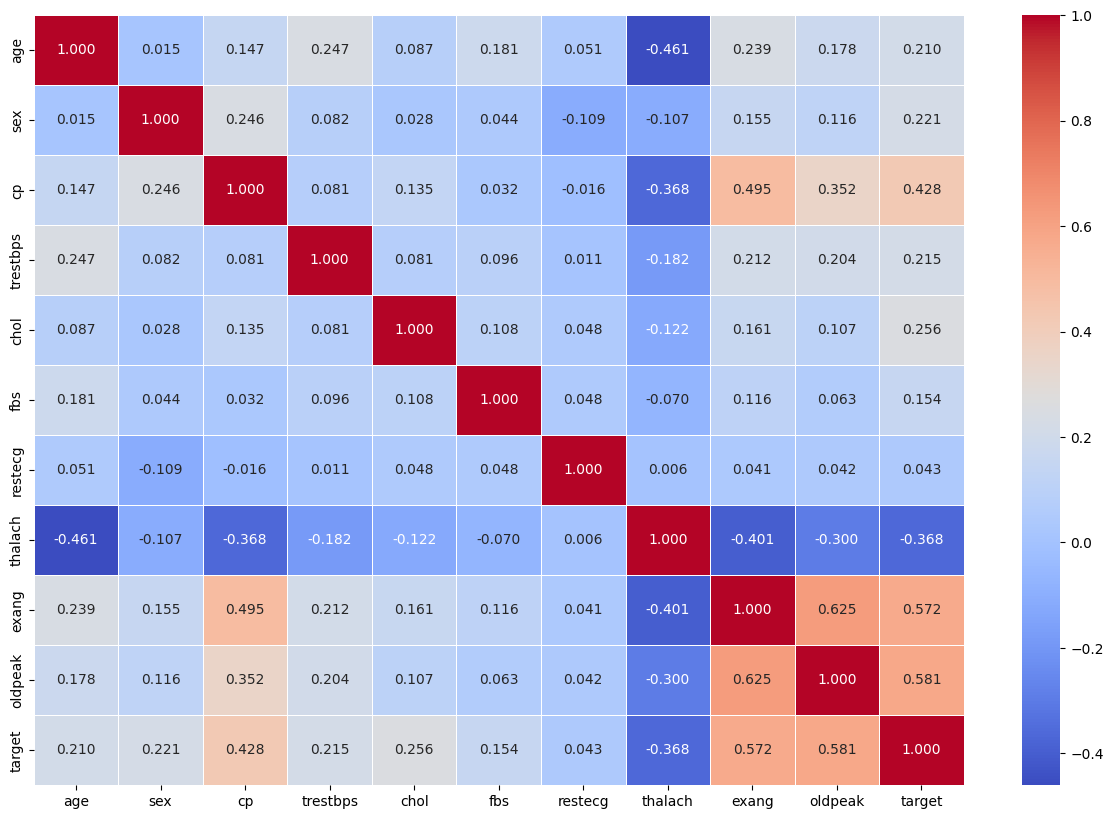

In [ ]:
# Menghitung matriks korelasi untuk DataFrame dfClean
cor_mat = dfClean.corr()

# Membuat visualisasi heatmap untuk matriks korelasi
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f", cmap='coolwarm')



**Kesimpulan dari Matriks Korelasi:**

1. **Usia (Age):**
  - Berkorelasi positif `('sex'), ('cp'),('trestbps'),('chol')('fbs'),('retecg'),('exang'),('oldpeak'),('target')`
   - Berkorelasi negatif dengan detak jantung maksimum `('thalach')`. *Semakin tinggi usia, semakin rendah detak jantung maksimum.*

2. **Jenis Kelamin (Sex):**
 - Berkorelasi positif dengan `('cp'),('trestbps'),('chol'),('fbs'),('age'),('exang'),('oldpeak'),('target')`
   - Berkorelasi negatif dengan `('retecg') dan ('thalach').`
3. **Jenis Nyeri Dada (Chest Pain Type - cp):**
 - Berkorelasi positif dengan `('sex'),('trestbps'),('chol'),('fbs'),('age'),('exang'),('oldpeak'),('target')`
   - Berkorelasi negatif dengan `('retecg') dan ('thalach').`

4. **Tekanan Darah Istirahat (Resting Blood Pressure - trestbps):**
 - Berkorelasi positif dengan `('sex'),('cp'),('chol'),('fbs'),('age'),('exang'),('oldpeak'),('target'),('retecg')`
   - Berkorelasi negatif dengan `('thalach').`
5. **Kolesterol (Cholesterol):**
 - Berkorelasi positif dengan `('sex'),('cp'),('trestbps'),('fbs'),('age'),('exang'),('oldpeak'),('target'),('retecg')`
   - Berkorelasi negatif dengan `('thalach').`.

6. **Gula Darah Puasa (Fasting Blood Sugar - fbs):**
 - Berkorelasi positif dengan `('sex'),('cp'),('trestbps'),('chol'),('age'),('exang'),('oldpeak'),('target'),('retecg')`
   - Berkorelasi negatif dengan `('thalach').`.
7. **Elektrokardiograf Resting (Resting Electrocardiographic Results - restecg):**
 - Berkorelasi positif dengan `('trestbps'),('fbs'),('age'),('exang'),('oldpeak'),('target'),('chol'),('thalach')`
   - Berkorelasi negatif dengan `('sex'),('cp').`.

8. **Detak Jantung Maksimum (Maximum Heart Rate Achieved - thalach):**
 - Berkorelasi positif dengan `('retecg')`
   - Berkorelasi negatif dengan `('sex'),('cp'),('fbs'),('age'),('exang'),('oldpeak'),('target'),('trestbps'),('chol') .`

9. **Angina Saat Berolahraga (Exercise Induced Angina - exang):**
   - Berkorelasi positif dengan `('sex'),('cp'),('age'),('trestbps'),('retecg'),('chol'),('fbs')`
   - Berkorelasi positif sangat kuat dengan depresi ST `('oldpeak')` dan hasil diagnosis `('target').`
   - Berkorelasi negatif dengan `('thalach').`.

10. **Depresi ST (ST Depression Induced by Exercise Relative to Rest - oldpeak):**
   - Berkorelasi positif dengan `('sex'),('cp'),('age'),('trestbps'),('retecg'),('chol'),('fbs')`
   - Berkorelasi positif sangat kuat dengan depresi ST `('exang')` dan hasil diagnosis `('target').`
   - Berkorelasi negatif dengan `('thalach').`.


11. **Hasil Diagnosis (Target):**
   - Berkorelasi positif dengan `('sex'),('cp'),('age'),('trestbps'),('retecg'),('chol'),('fbs')`
   - Berkorelasi positif sangat kuat dengan depresi ST `('exang')` dan hasil diagnosis `('oldpeak').`
   - Berkorelasi negatif dengan `('thalach').`.

**Catatan:**
- Korelasi tidak menyiratkan sebab-akibat; hasil ini hanya memberikan gambaran tentang hubungan statistik antara variabel.
- Analisis lebih lanjut dan kontekstual, serta penggunaan model statistik yang lebih lanjut, dapat memberikan wawasan yang lebih mendalam tentang faktor-faktor yang memengaruhi kesehatan jantung dalam dataset ini.

### *PAIR PLOT*



---


Membuat scatter plot untuk setiap pasangan variabel dalam dataset. Berguna untuk melihat hubungan dan distribusi antar variabel.

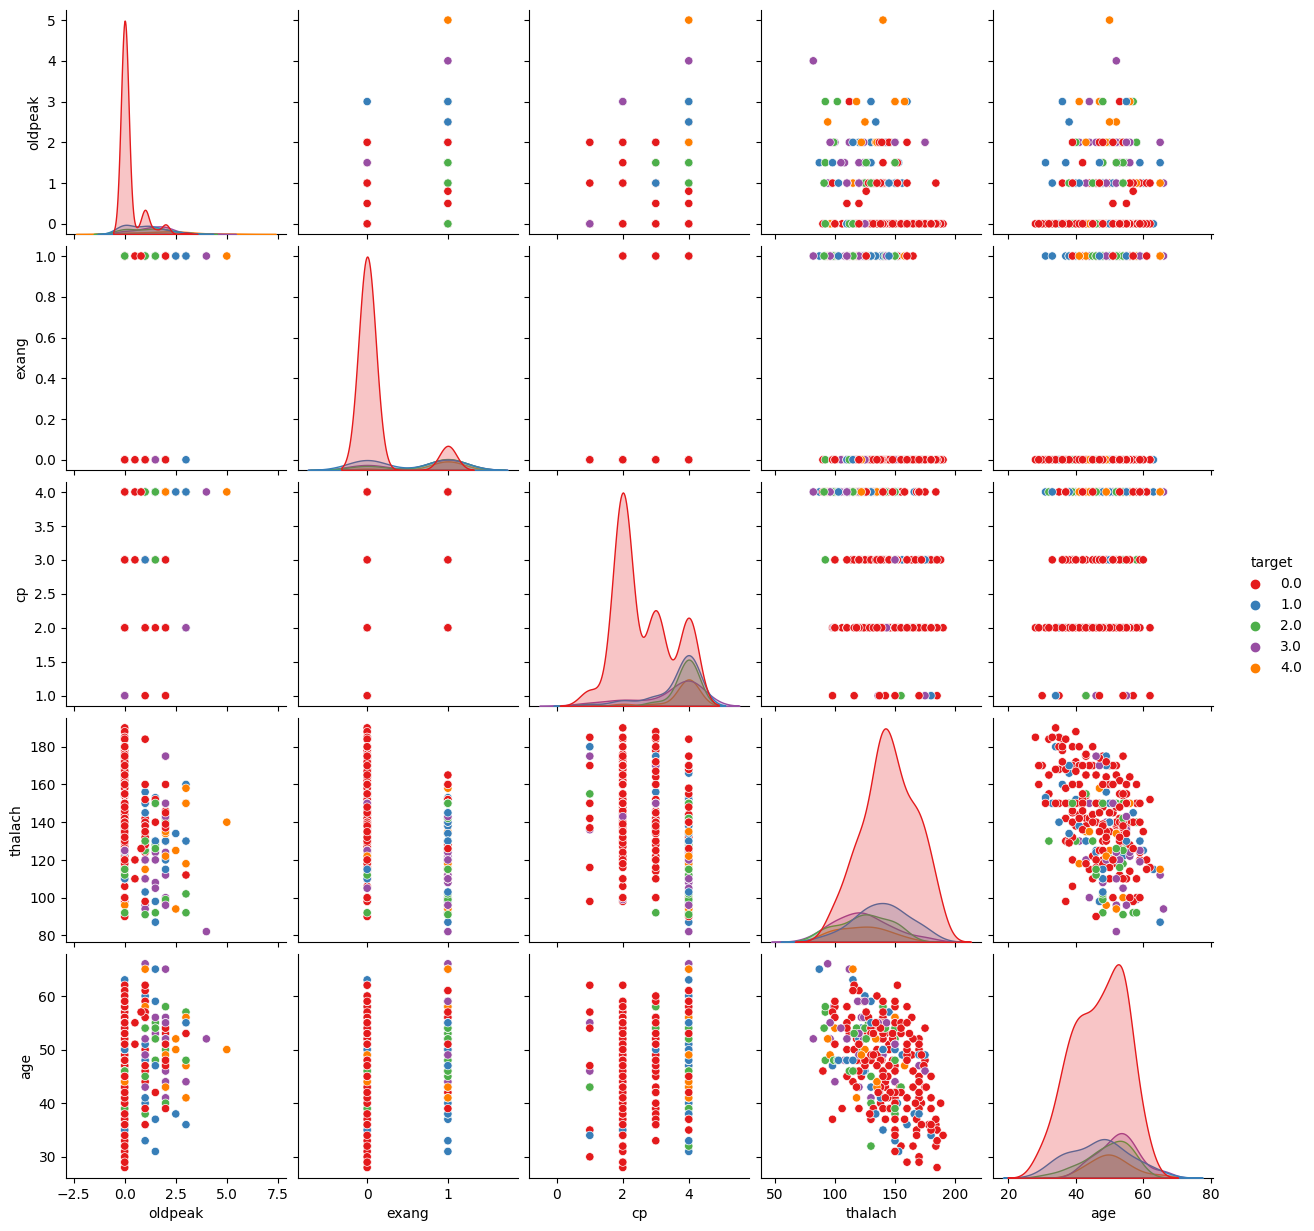

In [ ]:
# Menentukan variabel 'target' sebagai hue dan memilih beberapa variabel 'oldpeak', 'exang', 'cp', 'thalach', 'age' dipilih sebagai variabel untuk pair plot

sns.pairplot(dfClean, hue='target', vars=['oldpeak', 'exang', 'cp', 'thalach', 'age'], palette='Set1')